In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import birdsonganalysis as bsa
from copy import deepcopy
from os.path import join
import json
import pandas as pd
import pickle
from syllable_cluster import extract_syllables_feature, percentage_change, all_syllables_features

import sys

sys.path.append('../model')

from song_model import SongModel

sns.set_palette('colorblind')
%matplotlib inline

In [2]:
path = '../model/res/super_concurrent_170414_161118/50_conc+slow_dev+default_coef+big_ba+5_replay+on_alpha_zero_beta/'
with open(join(path, 'data_cur.pkl'), 'rb') as f:
    data = pickle.load(f)

In [3]:
root_data = [item[1] for item in data if item[0] == 'root']
rd = pd.DataFrame(root_data)
len(rd)

71

In [51]:
sm = rd.iloc[-1]['songs'][25]

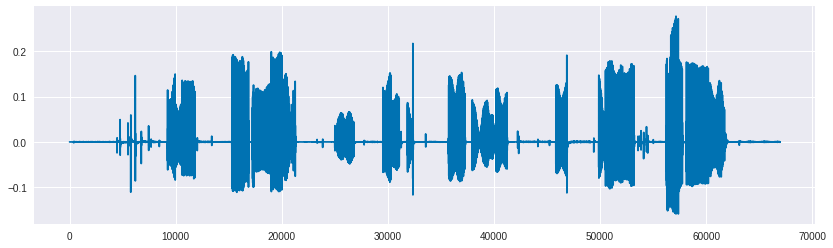

In [52]:
plt.figure(figsize=(14, 4))
plt.plot(sm.gen_sound())
plt.show()

In [53]:
from IPython.display import Audio

Audio(sm.gen_sound(), rate=44100)

11


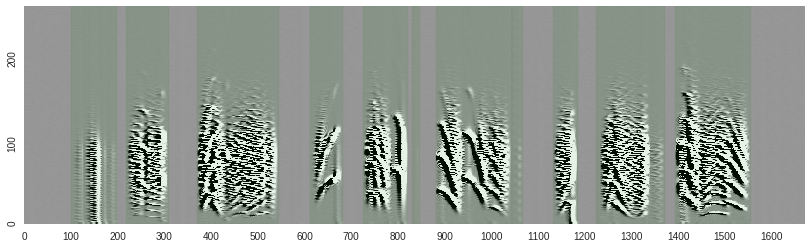

In [54]:
syllables_data = extract_syllables_feature(sm.gen_sound())
fig = plt.figure(figsize=(14, 4))
ax = fig.gca()
ax = bsa.spectral_derivs_plot(bsa.spectral_derivs(sm.gen_sound(), freq_range=256, fft_step=40, fft_size=1024), contrast=0.01, ax=ax)
print(len(syllables_data))
for syllable in syllables_data:
    ax.axvspan(syllable['beg'], syllable['end'], color='g', alpha=0.1)

In [8]:
from ipywidgets.widgets import FloatProgress
from IPython.display import display
progress = FloatProgress(min=0, max=1)
display(progress)
all_dat = all_syllables_features(rd, progress)

In [17]:
all_dat.to_hdf(join(path, 'syllables.hd5'), 'syllables')

In [30]:
first_day = 2
last_day = first_day  + 1
plot_dat = all_dat[((all_dat.day == first_day) & (all_dat.moment == 'evening') & (all_dat.isyb == 1))
                   | ((all_dat['day'] == last_day) & (all_dat['moment'] == 'morning')  & (all_dat.isyb == 1))]

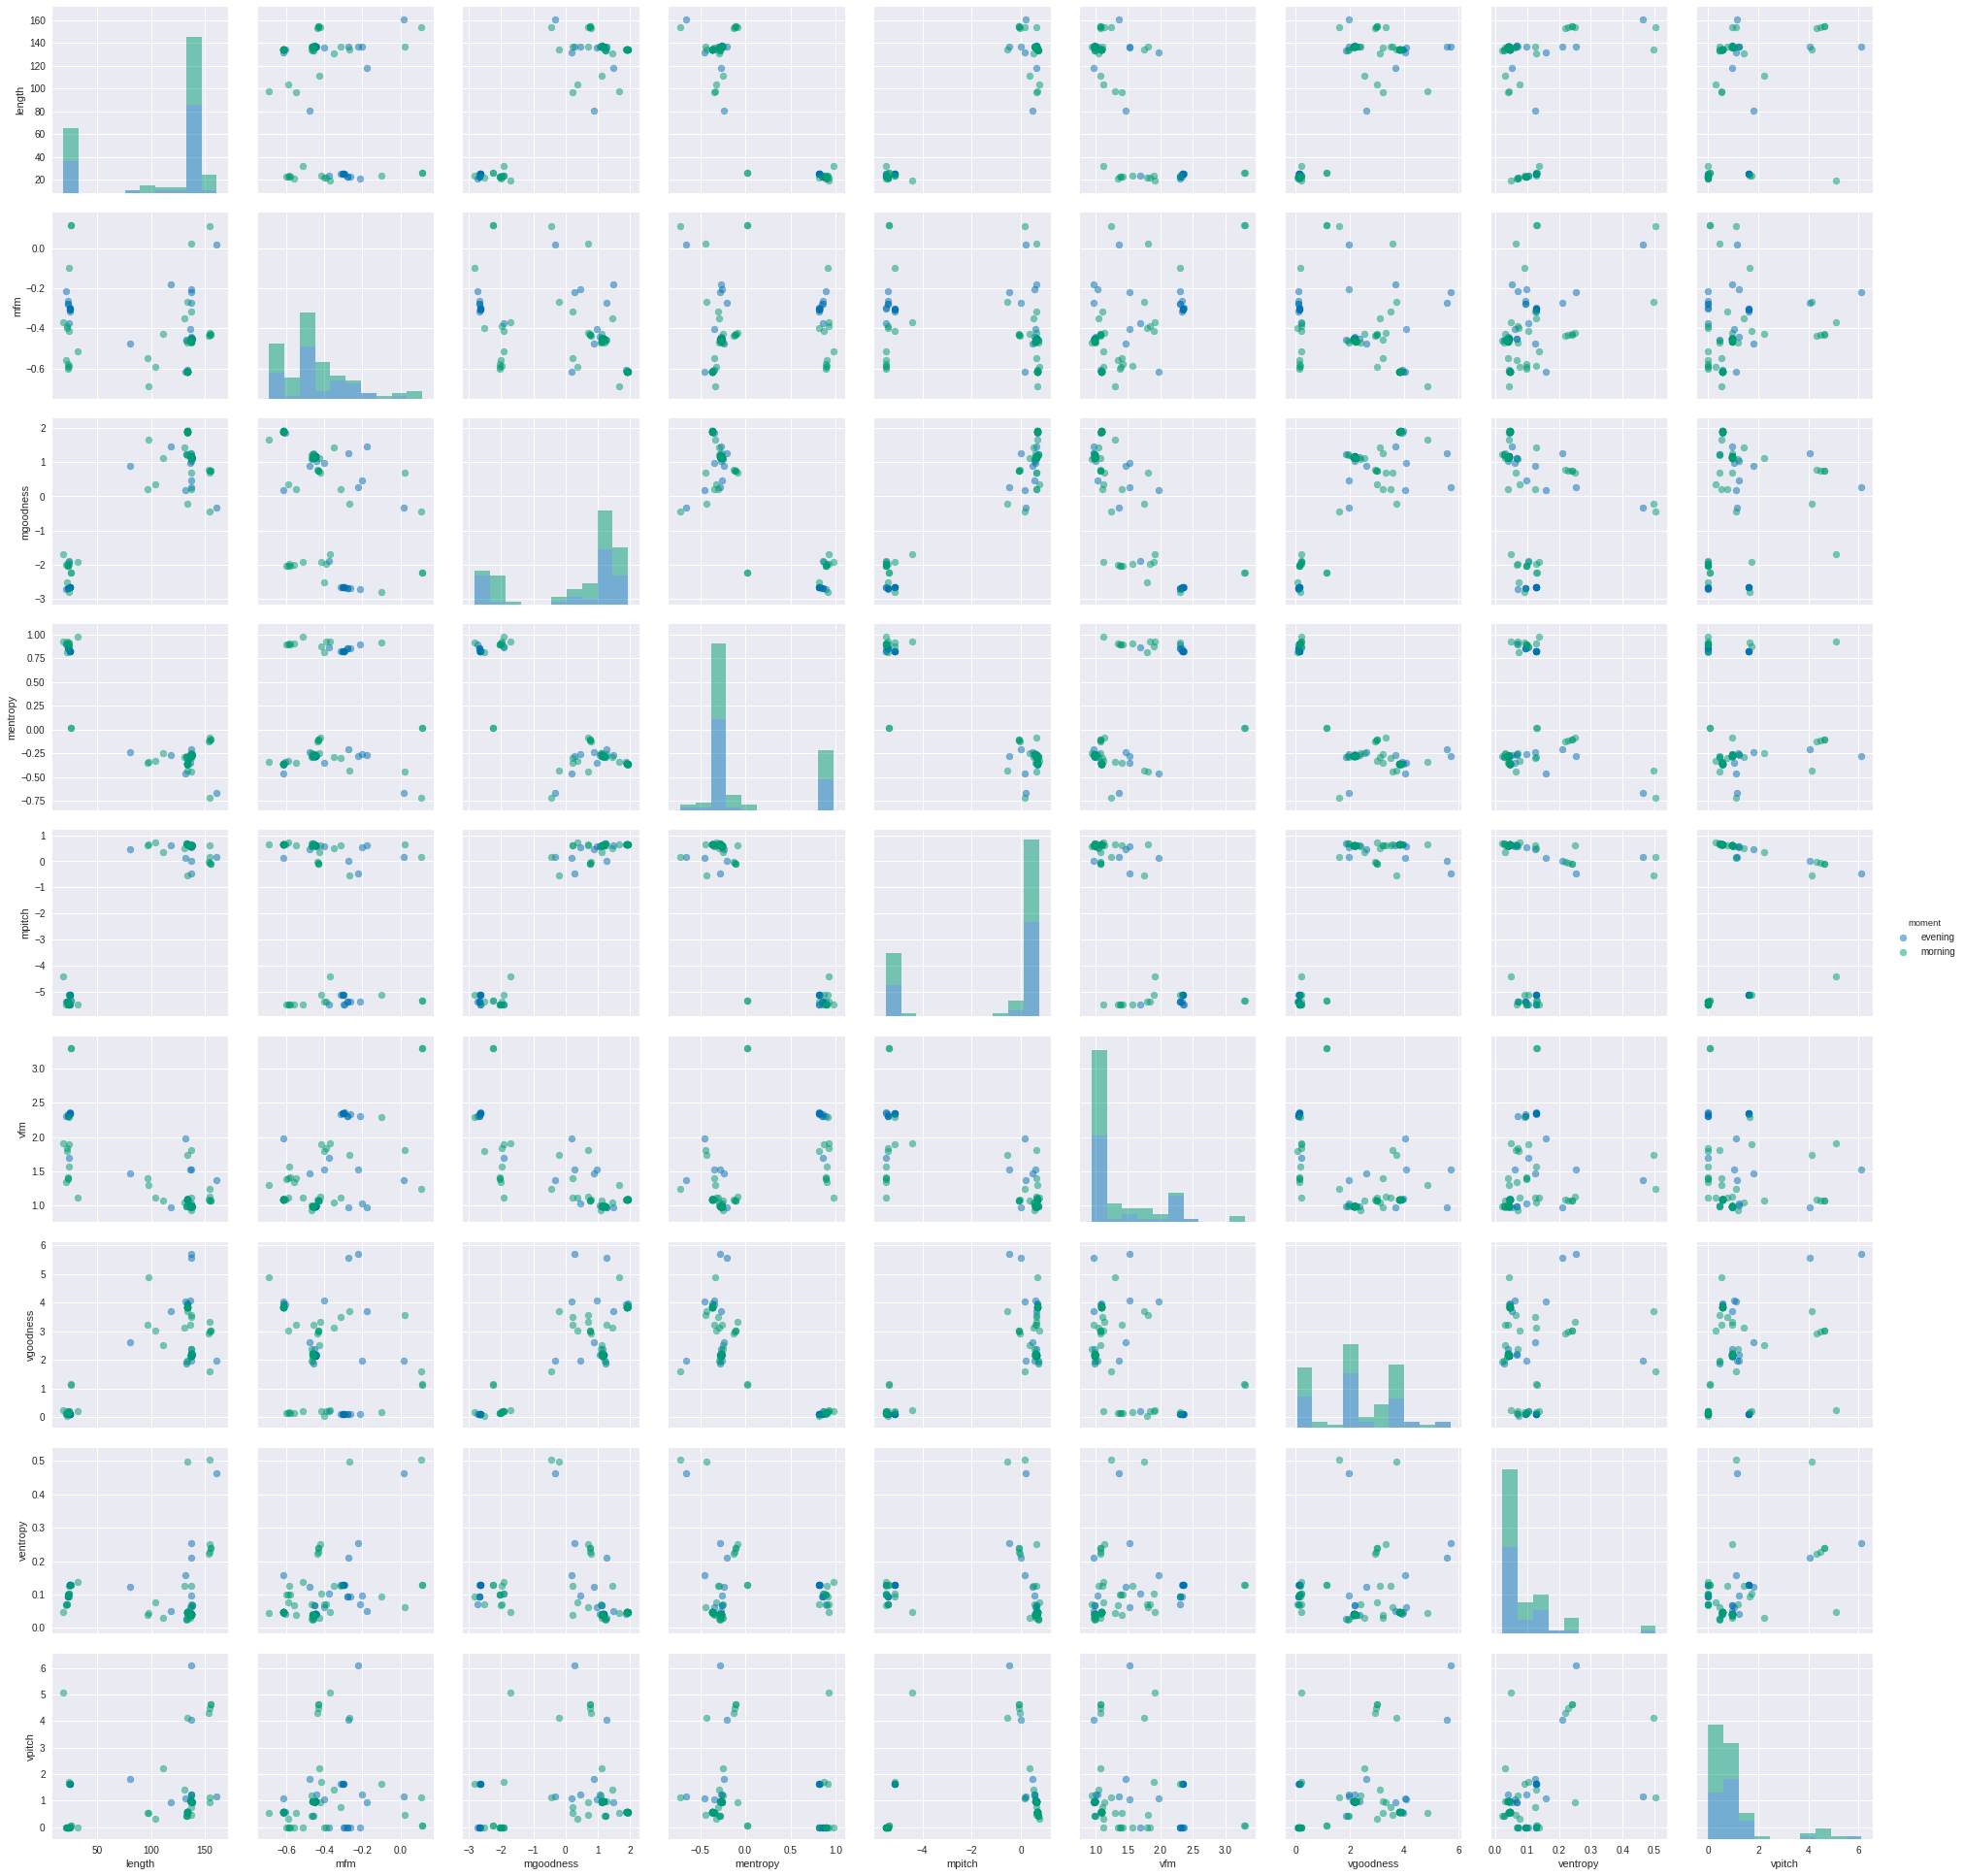

In [31]:
g = sns.PairGrid(plot_dat, hue="moment", vars=['length', 'mfm', 'mgoodness', 'mentropy', 'mpitch',
                                            'vfm', 'vgoodness', 'ventropy', 'vpitch'], size=3)
g.map_diag(plt.hist, alpha=0.5)
g.map_offdiag(plt.scatter, alpha=0.5)
g.add_legend()

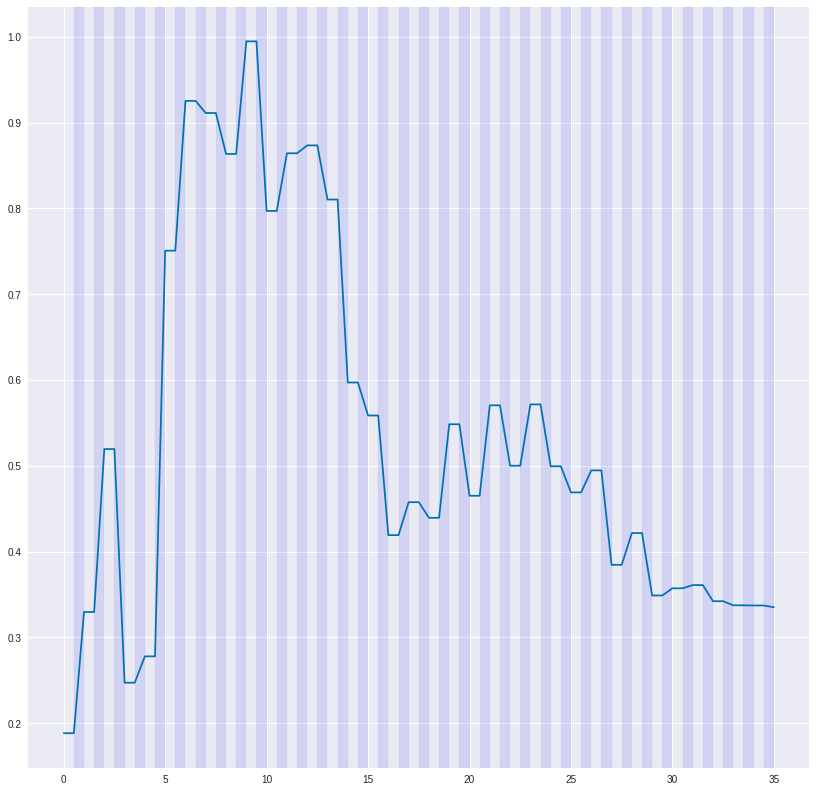

In [32]:
all_dat['comb'] = all_dat['day'] + np.where(all_dat['moment'] == 'evening', 0.5, 0)
plt.figure(figsize=(14, 14))
med_ventrop = all_dat.groupby('comb').quantile(0.95)['ventropy']
plt.plot(med_ventrop)
for day in range(35):
    plt.axvspan(day+0.5, day+1, color='b', alpha=0.1)

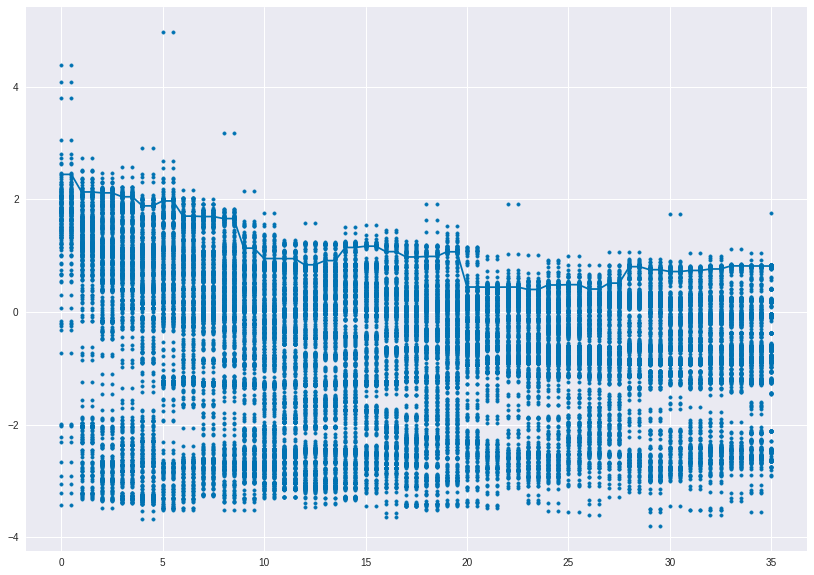

In [45]:
plt.figure(figsize=(14, 10))

plt.scatter(all_dat['comb'], all_dat['mgoodness'], marker='.')
plt.plot(all_dat.groupby('comb')['mgoodness'].quantile(0.95))

In [ ]:
def _running_mean(x, N):
    y = np.zeros((len(x),))
    for ctr in range(len(x)):
         y[ctr] = np.sum(x[ctr:(ctr+N)])
    return y/N

famp = bsa.normalize_features(bsa.all_song_features(sm.gen_sound(), 44100,
                              freq_range=256, fft_size=1024, fft_step=40))['amplitude']
sort_amp = np.sort(famp)
plt.plot(sort_amp[:-1], _running_mean(np.diff(sort_amp), 100))
plt.show()
len(famp)
famp[200]

In [18]:
load = pd.HDFStore(join(path, 'syllables.hd5'))

In [21]:
load['syllables']

,beg,day,end,isong,isyb,length,mam,mamplitude,mentropy,mfm,mgoodness,moment,mpitch,vam,vamplitude,ventropy,vfm,vgoodness,vpitch
0,0,0,1069,0,0,1069,-0.023236,0.749482,-0.368927,-0.483728,2.103435,morning,0.757348,1.676862e-01,0.006944,0.018676,0.485791,3.277597,6.542816e-02
1,1110,0,1179,0,1,69,-0.009289,0.508501,-0.277864,-0.352726,1.852797,morning,0.767989,3.372099e+00,0.126691,0.012809,1.538847,3.039989,5.059199e-04
2,1222,0,1346,0,2,124,-0.003655,0.632216,-0.295857,-0.362845,1.408530,morning,0.770652,1.884471e+00,0.078830,0.010008,0.748704,2.343549,7.023441e-04
3,1389,0,1571,0,3,182,-0.002228,0.664227,-0.332220,-0.346479,1.709811,morning,0.765484,1.288237e+00,0.064100,0.014912,0.691105,3.322057,5.616952e-04
4,43,0,292,1,0,249,-0.000653,0.560598,-0.378608,-0.599050,2.111421,morning,0.647242,9.845748e-01,0.450260,0.046480,0.780153,3.584820,7.278383e-01
5,325,0,571,1,1,246,-0.000421,0.603739,-0.339840,-0.506827,1.968168,morning,0.717584,9.746436e-01,0.292805,0.064920,0.773307,3.958792,3.080545e-01
6,601,0,1575,1,2,974,-0.000378,0.685983,-0.371716,-0.408516,2.054612,morning,0.721258,2.594489e-01,0.235356,0.027850,0.591782,3.493755,2.683776e-01
7,1609,0,1630,1,3,21,-0.000085,-5.410879,1.142223,0.068840,-2.002433,morning,-5.482181,4.604725e-07,0.015537,0.014410,0.317479,0.141791,3.155444e-30
8,0,0,133,2,0,133,-0.064233,0.223946,-0.314677,-0.624040,1.784639,morning,0.722208,1.955543e-01,0.027381,0.010812,0.274624,3.128631,2.772527e-01
9,215,0,273,2,1,58,0.001283,0.816284,-0.817846,-0.604843,2.226527,morning,0.765603,1.900239e+01,0.249708,0.287430,1.634261,9.684783,4.321730e-04
